<a href="https://colab.research.google.com/gist/NaveenReddy451491/7a75b2b1d4db0608e05cad12e6db5869/house_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
data=pd.read_csv("housing.csv")

In [6]:
data

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.45857,5.682861,7.009188,4.09,23086.80050,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.64245,6.002900,6.730821,3.09,40173.07217,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.06718,5.865890,8.512727,5.13,36882.15940,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.24005,7.188236,5.586729,3.26,34310.24283,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.19723,5.040555,7.839388,4.23,26354.10947,6.309435e+05,USNS Raymond\nFPO AE 09386
...,...,...,...,...,...,...,...
4995,60567.94414,7.830362,6.137356,3.46,22837.36103,1.060194e+06,USNS Williams\nFPO AP 30153-7653
4996,78491.27543,6.999135,6.576763,4.02,25616.11549,1.482618e+06,"PSC 9258, Box 8489\nAPO AA 42991-3352"
4997,63390.68689,7.250591,4.805081,2.13,33266.14549,1.030730e+06,"4215 Tracy Garden Suite 076\nJoshualand, VA 01..."
4998,68001.33124,5.534388,7.130144,5.44,42625.62016,1.198657e+06,USS Wallace\nFPO AE 73316


In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  int64  
 3   total_rooms         20640 non-null  int64  
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  int64  
 6   households          20640 non-null  int64  
 7   median_income       20640 non-null  float64
 8   ocean_proximity     20640 non-null  object 
 9   median_house_value  20640 non-null  int64  
dtypes: float64(4), int64(5), object(1)
memory usage: 1.6+ MB


In [17]:
data.dropna(inplace=True)

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  int64  
 3   total_rooms         20433 non-null  int64  
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  int64  
 6   households          20433 non-null  int64  
 7   median_income       20433 non-null  float64
 8   ocean_proximity     20433 non-null  object 
 9   median_house_value  20433 non-null  int64  
dtypes: float64(4), int64(5), object(1)
memory usage: 1.7+ MB


In [19]:
from sklearn.model_selection import train_test_split

X=data.drop(['median_house_value'],axis=1)
y=data['median_house_value']

In [20]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)

In [21]:
train_data=X_train.join(y_train)
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
15261,-117.26,33.02,9,4632,759.0,1724,685,6.3712,NEAR OCEAN,369800
2960,-119.04,35.35,27,4590,897.0,2212,894,3.1753,INLAND,85000
7358,-118.17,33.96,29,2913,787.0,3803,740,2.5556,<1H OCEAN,146500
13586,-117.28,34.12,47,2456,611.0,1653,512,1.3973,INLAND,66100
18183,-122.04,37.37,42,1125,273.0,616,258,3.6765,<1H OCEAN,252800
...,...,...,...,...,...,...,...,...,...,...
2448,-119.53,36.55,34,2065,343.0,1041,313,3.2917,INLAND,111500
13388,-117.59,34.10,17,3646,1035.0,1987,895,2.3603,INLAND,139300
9957,-122.29,38.40,28,2024,340.0,844,309,4.7833,INLAND,361100
7922,-118.08,33.86,29,3260,783.0,1969,737,3.5268,<1H OCEAN,215500


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

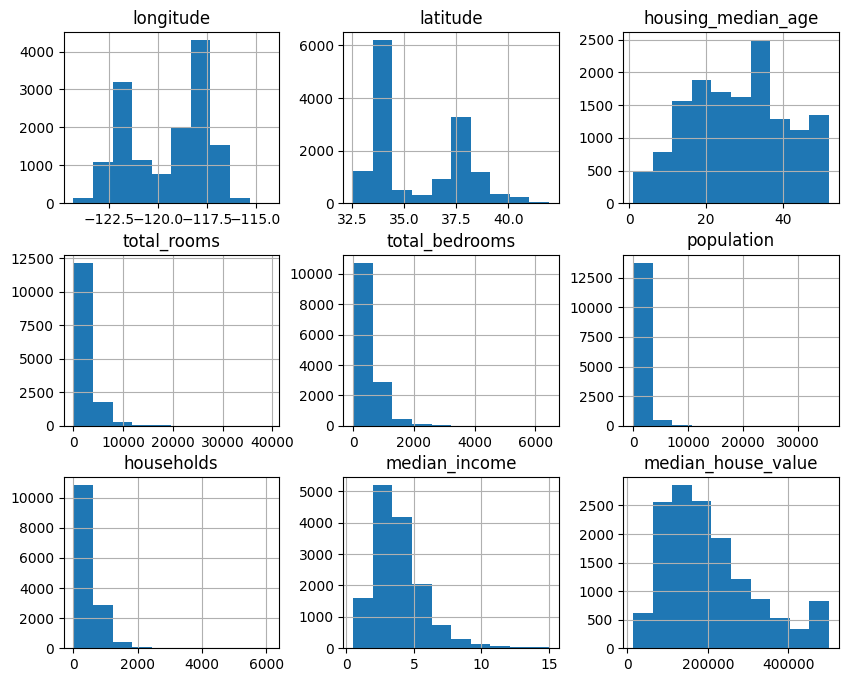

In [22]:
train_data.hist(figsize=(10,8))

<ipython-input-23-aecb5de6070f>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(train_data.corr(),annot=True, cmap="YlGnBu")


<Axes: >

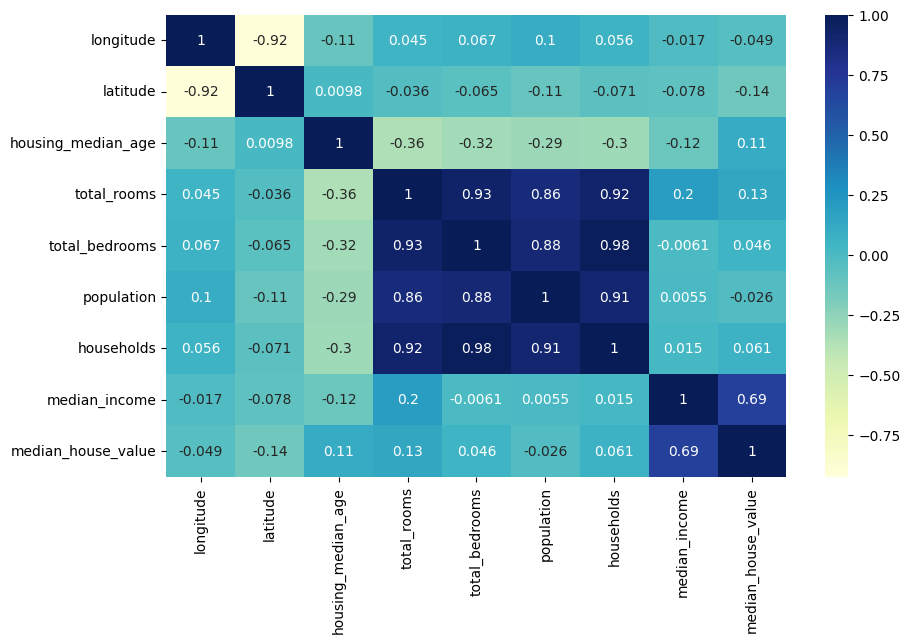

In [23]:
plt.figure(figsize=(10,6))
sns.heatmap(train_data.corr(),annot=True, cmap="YlGnBu")

In [24]:
train_data['total_rooms']=np.log(train_data['total_rooms']+1)
train_data['total_bedrooms']=np.log(train_data['total_bedrooms']+1)
train_data['population']=np.log(train_data['population']+1)
train_data['households']=np.log(train_data['households']+1)
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
15261,-117.26,33.02,9,8.440960,6.633318,7.452982,6.530878,6.3712,NEAR OCEAN,369800
2960,-119.04,35.35,27,8.431853,6.800170,7.702104,6.796824,3.1753,INLAND,85000
7358,-118.17,33.96,29,7.977282,6.669498,8.243808,6.608001,2.5556,<1H OCEAN,146500
13586,-117.28,34.12,47,7.806696,6.416732,7.410952,6.240276,1.3973,INLAND,66100
18183,-122.04,37.37,42,7.026427,5.613128,6.424869,5.556828,3.6765,<1H OCEAN,252800
...,...,...,...,...,...,...,...,...,...,...
2448,-119.53,36.55,34,7.633370,5.840642,6.948897,5.749393,3.2917,INLAND,111500
13388,-117.59,34.10,17,8.201660,6.943122,7.594884,6.797940,2.3603,INLAND,139300
9957,-122.29,38.40,28,7.613325,5.831882,6.739337,5.736572,4.7833,INLAND,361100
7922,-118.08,33.86,29,8.089789,6.664409,7.585789,6.603944,3.5268,<1H OCEAN,215500


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

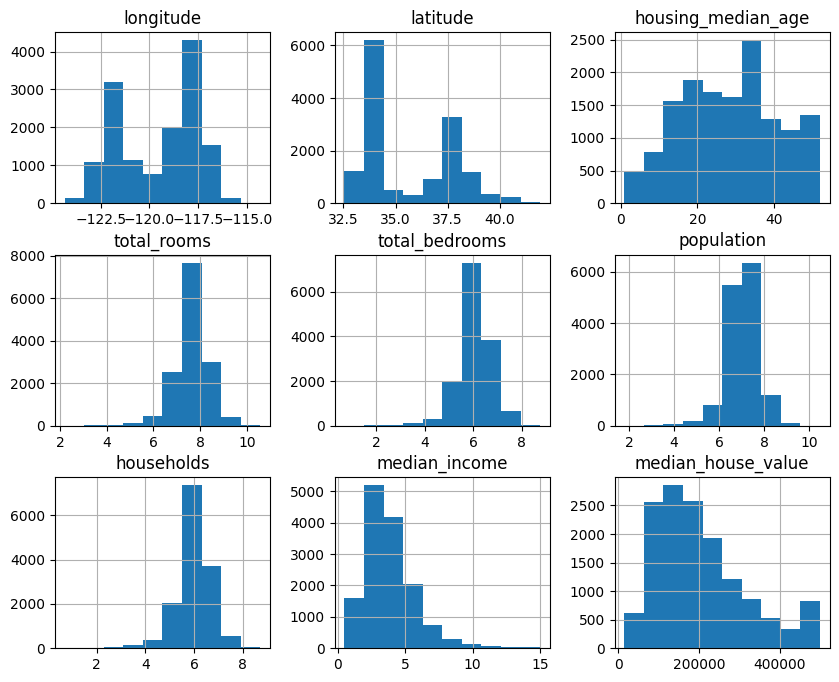

In [25]:
train_data.hist(figsize=(10,8))

In [26]:
train_data.ocean_proximity.value_counts()
pd.get_dummies(train_data.ocean_proximity)
train_data.join(pd.get_dummies(train_data.ocean_proximity))
train_data=train_data.join(pd.get_dummies(train_data.ocean_proximity)).drop(['ocean_proximity'],axis=1)

<Axes: >

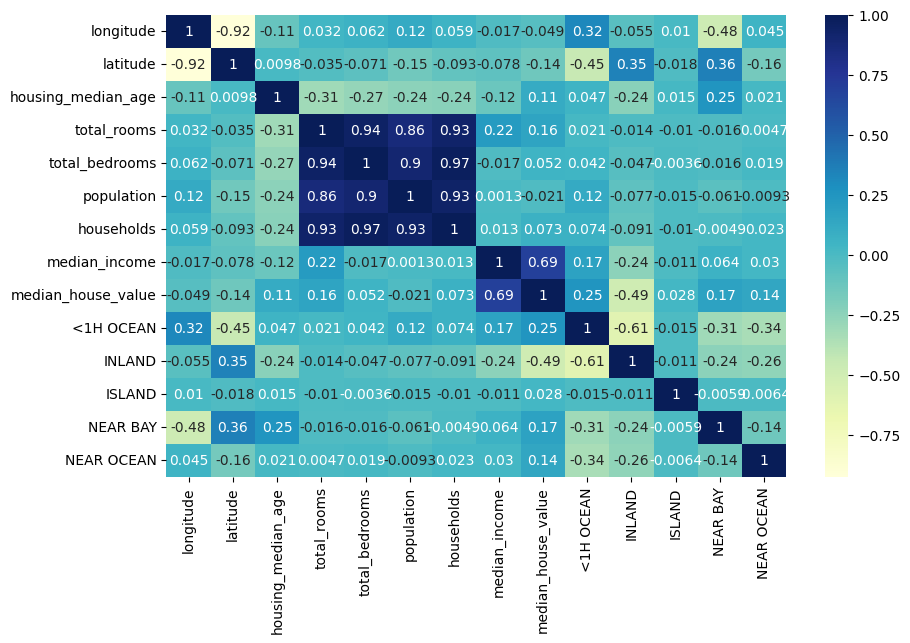

In [27]:
plt.figure(figsize=(10,6))
sns.heatmap(train_data.corr(),annot=True, cmap="YlGnBu")

<Axes: xlabel='latitude', ylabel='longitude'>

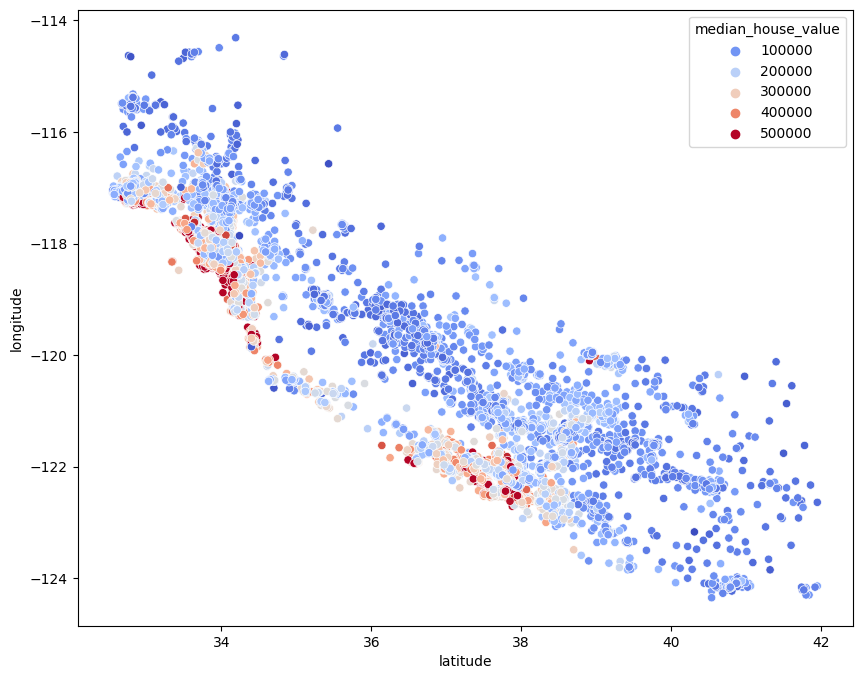

In [28]:
plt.figure(figsize=(10,8))
sns.scatterplot(x="latitude",y="longitude",data=train_data,hue="median_house_value",palette="coolwarm")

In [29]:
train_data['bedroom_ratio']=train_data['total_bedrooms']/train_data['total_rooms']
train_data['households_ratio']=train_data['households']/train_data['total_rooms']

<Axes: >

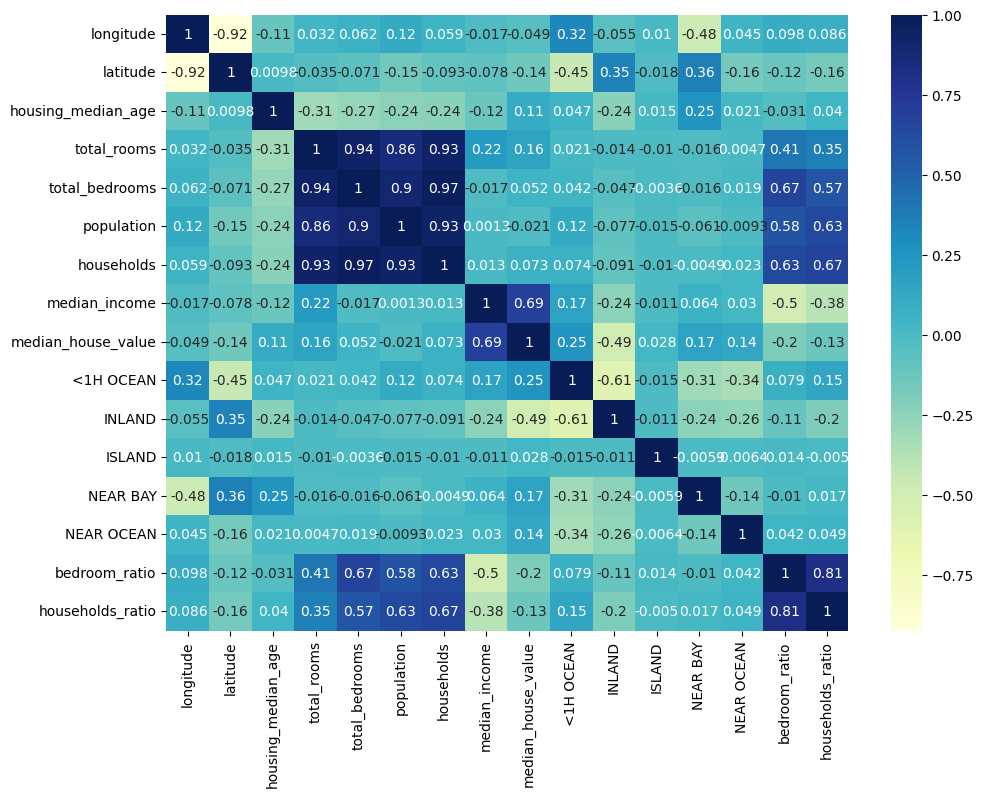

In [30]:
plt.figure(figsize=(11,8))
sns.heatmap(train_data.corr(),annot=True, cmap="YlGnBu")

### Linear regression

In [31]:
from sklearn.linear_model import LinearRegression
train_data=train_data.drop(['ISLAND'],axis=1)
X_train, y_train= train_data.drop(['median_house_value'],axis=1), train_data['median_house_value']

reg=LinearRegression()
reg.fit(X_train,y_train)

LinearRegression()

In [32]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,NEAR BAY,NEAR OCEAN,bedroom_ratio,households_ratio
15261,-117.26,33.02,9,8.440960,6.633318,7.452982,6.530878,6.3712,369800,0,0,0,1,0.785849,0.773713
2960,-119.04,35.35,27,8.431853,6.800170,7.702104,6.796824,3.1753,85000,0,1,0,0,0.806486,0.806089
7358,-118.17,33.96,29,7.977282,6.669498,8.243808,6.608001,2.5556,146500,1,0,0,0,0.836061,0.828352
13586,-117.28,34.12,47,7.806696,6.416732,7.410952,6.240276,1.3973,66100,0,1,0,0,0.821952,0.799349
18183,-122.04,37.37,42,7.026427,5.613128,6.424869,5.556828,3.6765,252800,1,0,0,0,0.798860,0.790847
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2448,-119.53,36.55,34,7.633370,5.840642,6.948897,5.749393,3.2917,111500,0,1,0,0,0.765146,0.753192
13388,-117.59,34.10,17,8.201660,6.943122,7.594884,6.797940,2.3603,139300,0,1,0,0,0.846551,0.828849
9957,-122.29,38.40,28,7.613325,5.831882,6.739337,5.736572,4.7833,361100,0,1,0,0,0.766010,0.753491
7922,-118.08,33.86,29,8.089789,6.664409,7.585789,6.603944,3.5268,215500,1,0,0,0,0.823805,0.816331


In [33]:
test_data=X_test.join(y_test)
test_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
3375,-118.28,34.25,35,2045,450.0,1166,407,3.5214,<1H OCEAN,197600
12472,-121.47,38.58,44,2092,555.0,878,528,1.5922,INLAND,115100
16040,-122.47,37.71,42,1961,427.0,1211,409,3.5156,NEAR OCEAN,239400
15202,-117.08,32.91,16,1653,228.0,690,224,6.5853,<1H OCEAN,248400
12492,-121.48,38.57,38,2809,805.0,1243,785,1.8512,INLAND,114100
...,...,...,...,...,...,...,...,...,...,...
19536,-120.93,37.65,1,2254,328.0,402,112,4.2500,INLAND,189200
7105,-118.00,33.90,35,1942,332.0,1127,325,4.5144,<1H OCEAN,206300
3075,-119.23,35.77,36,3225,635.0,2034,593,2.4044,INLAND,72500
20453,-118.78,34.27,20,2743,685.0,1798,613,3.6761,<1H OCEAN,170900


In [34]:
test_data['total_rooms']=np.log(test_data['total_rooms']+1)
test_data['total_bedrooms']=np.log(test_data['total_bedrooms']+1)
test_data['population']=np.log(test_data['population']+1)
test_data['households']=np.log(test_data['households']+1)



In [35]:
test_data=test_data.join(pd.get_dummies(test_data.ocean_proximity)).drop(['ocean_proximity'],axis=1)
test_data=test_data.drop(['ISLAND'],axis=1)

In [36]:
test_data['bedroom_ratio']=test_data['total_bedrooms']/test_data['total_rooms']
test_data['households_ratio']=test_data['households']/test_data['total_rooms']

In [37]:
X_test, y_test= test_data.drop(['median_house_value'],axis=1), test_data['median_house_value']

In [38]:
test_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,NEAR BAY,NEAR OCEAN,bedroom_ratio,households_ratio
3375,-118.28,34.25,35,7.623642,6.111467,7.062192,6.011267,3.5214,197600,1,0,0,0,0.801647,0.788503
12472,-121.47,38.58,44,7.646354,6.320768,6.778785,6.270988,1.5922,115100,0,1,0,0,0.826638,0.820128
16040,-122.47,37.71,42,7.581720,6.059123,7.100027,6.016157,3.5156,239400,0,0,0,1,0.799175,0.793508
15202,-117.08,32.91,16,7.410952,5.433722,6.538140,5.416100,6.5853,248400,1,0,0,0,0.733202,0.730824
12492,-121.48,38.57,38,7.940940,6.692084,7.126087,6.666957,1.8512,114100,0,1,0,0,0.842732,0.839568
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19536,-120.93,37.65,1,7.720905,5.796058,5.998937,4.727388,4.2500,189200,0,1,0,0,0.750697,0.612284
7105,-118.00,33.90,35,7.571988,5.808142,7.028201,5.786897,4.5144,206300,1,0,0,0,0.767056,0.764251
3075,-119.23,35.77,36,8.078998,6.455199,7.618251,6.386879,2.4044,72500,0,1,0,0,0.799010,0.790553
20453,-118.78,34.27,20,7.917172,6.530878,7.494986,6.419995,3.6761,170900,1,0,0,0,0.824900,0.810895


In [39]:
reg.score(X_test,y_test)

0.6696353960428139

### random-forest (Extra)

In [40]:
from sklearn.ensemble import RandomForestRegressor
forest=RandomForestRegressor()
forest.fit(X_train,y_train)

RandomForestRegressor()

In [41]:
forest.score(X_test,y_test)

0.8175308783289199